# Univariate Analysis on Breast Cancer Data

### There are in general 2 reasons why feature selection is important:

##### To reduce overfitting the data and improve the generalization of models.
##### To get better understanding of features and their relationship to the response variables.

#### Univariate Feature selection examines each variable individually to determine the strength of the relationship of the feature with response variables.  These methods are simple to run and understand and are in general particularly good for gaining a better understanding of data (but not necessarily for optimizing the feature set for better generalization)

#### Correlation
#### Maximal information coefficient (MIC)

#### The above two methods work if the variables are linearly dependent on the response variable, for variables that shares non-linear relationships with the response, the correlation turns out to be 0.
##### Model Based Selection can work well enough with the nonlinear variables.
#### Model based ranking: Decision Tress, Random Forest


### Importing our libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading our Cancer Dataset

In [99]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Feature Ranking based on F Value & P Value: f_regression

In [13]:
from sklearn.feature_selection import f_regression
fvalue , pvalue = f_regression(cancer.data,cancer.target)

In [26]:
np.set_printoptions(precision=2 , suppress=True)
val = list(zip(fvalue,pvalue))

In [100]:
fpvalues = pd.DataFrame(val, index=cancer['feature_names'], columns=['fValue','pValue'])
fpvalues.sort_values(by='fValue', ascending=False)

,fValue,pValue
worst concave points,964.385393,1.969100e-124
worst perimeter,897.944219,5.771397e-119
mean concave points,861.676020,7.101150e-116
worst radius,860.781707,8.482292e-116
mean perimeter,697.235272,8.436251e-101
worst area,661.600206,2.828848e-97
mean radius,646.981021,8.465941e-96
mean area,573.060747,4.734564e-88
mean concavity,533.793126,9.966556e-84
worst concavity,436.691939,2.464664e-72


### Feature Ranking based on Correlation

In [103]:
df_feature = pd.DataFrame(data=cancer['data'] , columns=cancer['feature_names'] )
df_target = pd.DataFrame(data=cancer['target'], columns=['target'])
df = df_feature.join(df_target)

df.corr()['target'].sort_values(ascending=True)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

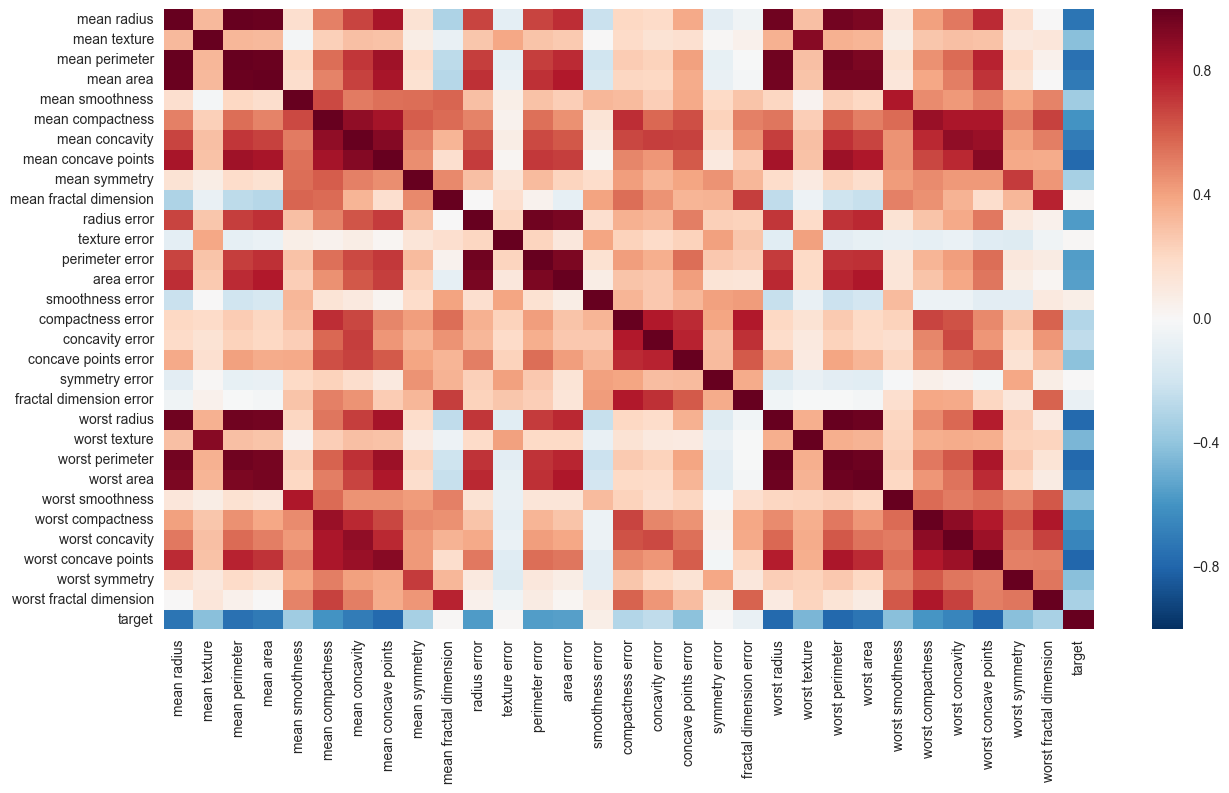

In [105]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

### Model Based Ranking: Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score , ShuffleSplit
rfc = RandomForestClassifier(n_estimators=20, max_depth=4)

scores = []
for i in range(cancer.data.shape[1]):
    score = cross_val_score(estimator=rfc , X = cancer.data[: , i:i+1 ], y=cancer.target, cv=ShuffleSplit(len(X), 10, .3) )
    scores.append((round(np.mean(score),3) , cancer['feature_names'][i]))
print (sorted(scores, reverse=True))

[(0.90700000000000003, 'worst concave points'), (0.90500000000000003, 'mean concave points'), (0.89900000000000002, 'worst perimeter'), (0.89900000000000002, 'worst area'), (0.89000000000000001, 'worst radius'), (0.875, 'mean perimeter'), (0.872, 'mean area'), (0.86399999999999999, 'mean radius'), (0.86399999999999999, 'mean concavity'), (0.84099999999999997, 'worst concavity'), (0.83899999999999997, 'area error'), (0.80500000000000005, 'radius error'), (0.79600000000000004, 'perimeter error'), (0.77500000000000002, 'mean compactness'), (0.76600000000000001, 'worst compactness'), (0.72199999999999998, 'concave points error'), (0.71899999999999997, 'mean texture'), (0.71399999999999997, 'worst texture'), (0.71099999999999997, 'worst smoothness'), (0.67500000000000004, 'worst symmetry'), (0.67500000000000004, 'concavity error'), (0.66900000000000004, 'worst fractal dimension'), (0.66100000000000003, 'compactness error'), (0.63800000000000001, 'mean symmetry'), (0.63600000000000001, 'mean